In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data = "data/city_data.csv"
ride_data = "data/ride_data.csv"

# Read the City and Ride Data
city_df = pd.read_csv("data/city_data.csv")
ride_df = pd.read_csv("data/ride_data.csv")

In [2]:
city_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [3]:
ride_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [4]:
# Combine the data into a single dataset
merged_df = city_df.merge(ride_df, on = "city", how = "outer")

# Display the data table for preview
merged_df.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [5]:
urban_df = merged_df.loc[(merged_df["type"] == "Urban")]
suburban_df = merged_df.loc[(merged_df["type"] == "Suburban")]
rural_df = merged_df.loc[(merged_df["type"] == "Rural")]

In [6]:
# Obtain the x and y coordinates for each of the three city types
avg_fare_urban = urban_df.groupby(["city"])["fare"].mean()
total_rides_urban = urban_df.groupby(["city"])["ride_id"].count()
total_drivers_urban = city_df.loc[(city_df["type"] == "Urban")]["driver_count"]

In [7]:
avg_fare_suburban = suburban_df.groupby(["city"])["fare"].mean()
total_rides_suburban = suburban_df.groupby(["city"])["ride_id"].count()
total_drivers_suburban = city_df.loc[(city_df["type"] == "Suburban")]["driver_count"]

In [8]:
avg_fare_rural = rural_df.groupby(["city"])["fare"].mean()
total_rides_rural = rural_df.groupby(["city"])["ride_id"].count()
total_drivers_rural = city_df.loc[(city_df["type"] == "Rural")]["driver_count"]

##Bubble Plot of Ride Sharing Data

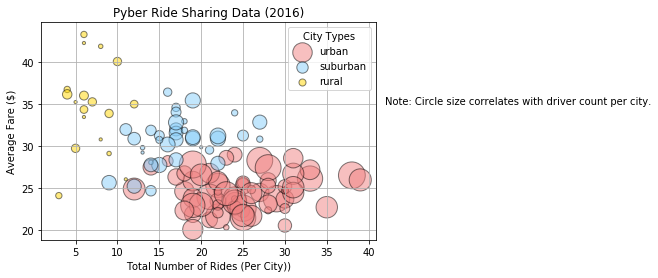

In [9]:
# Build the scatter plots for each city types
plt.scatter(total_rides_urban, avg_fare_urban, s=total_drivers_urban*10, marker = "o", facecolors = "lightcoral",
           edgecolors = "black", alpha = 0.5, label = "urban")

plt.scatter(total_rides_suburban, avg_fare_suburban, s=total_drivers_suburban*10, marker = "o", facecolors = "lightskyblue",
           edgecolors = "black", alpha = 0.5, label = "suburban")

plt.scatter(total_rides_rural, avg_fare_rural, s=total_drivers_rural*10, marker = "o", facecolors = "gold",
           edgecolors = "black", alpha = 0.5, label = "rural")

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City))")
plt.ylabel("Average Fare ($)")
plt.grid(b=True, which="major", axis="both")

# Create a legend
plt.legend(loc = "upper right", title = "City Types")

# Incorporate a text label regarding circle size
plt.text(42, 35, "Note: Circle size correlates with driver count per city.")
# Save Figure
plt.savefig("Images/Pyber Ride Sharing.png")

In [10]:
# Show plot
plt.show()

## Total Fares by City Type

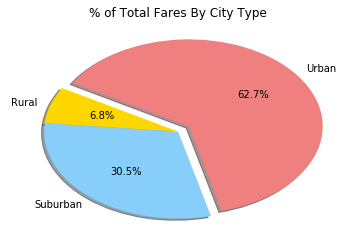

In [11]:
# Calculate Type Percents
total_fare = merged_df.groupby(["type"])["fare"].sum()

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)
plt.pie(total_fare, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Fares By City Type")
# Save Figure
plt.savefig("Images/% of Total Fares By City Type.png")

In [12]:
# Show Figure
plt.show()

## Total Rides by City Type

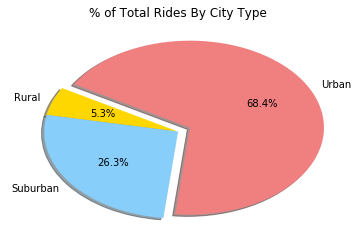

In [13]:
# Calculate Ride Percents
total_rides = merged_df.groupby(["type"])["ride_id"].count()

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)
plt.pie(total_rides, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Rides By City Type")

# Save Figure
plt.savefig("Images/% of Total Rides By City Type.png")

In [14]:
# Show Figure
plt.show()

## Total Drivers by City Type

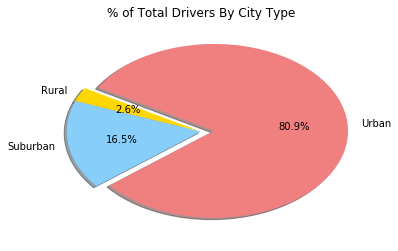

In [15]:
# Calculate Driver Percents
total_drivers = city_df.groupby(["type"])["driver_count"].sum()

# Build Pie Charts
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.1)
plt.pie(total_drivers, explode=explode, labels=labels, colors=colors, autopct="%1.1f%%", shadow=True, startangle=150)
plt.title("% of Total Drivers By City Type")

# Save Figure
plt.savefig("Images/% of Total Drivers By City Type.png")

In [16]:
# Show Figure
plt.show()

In [17]:
# 1.  The total number of drivers increased with city size, from rural to suburban, to urban cities, which makes sense because a
# larger population would demand more drivers.
# 2.  Rural cities generally had higher average fares than suburban and urban cities, which makes sense because they would
# probably have a greater distance between origin and destination.
# 3.  While urban cities tended to have lower fares, they made up the greatest percentage of total fares. This makes sense
# because a larger population in an area with many destinations would allow drivers to complete many low fare trips in a day. 